In [49]:
import pandas as pd
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from algo_implementation import logistic_regression, add_columns_with_combinations


In [50]:
train_df = pd.read_csv('datasets\\train_dataset1.csv')
test_df = pd.read_csv('datasets\\test_dataset1.csv')

X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

# Logistic regression model

## Comparison of our model and sklearn LogisticRegression

In [8]:
model = logistic_regression(regularization='none')
model.fit(X_train, y_train)
accuracy = model.accuracy(X_test, y_test)
print('accuracy: {:.2f}'.format(accuracy))
print('intercept:', model.intercept_)
print('coefs', model.coef_)

accuracy: 0.95
intercept: -8.53786277728293
coefs [ 13.08817499  16.75611016 -12.11065235 129.02866858 -43.94008025
   9.204966    35.98470416   0.35744577  36.08343027  37.30925996
   2.0502761   39.40356342  39.39554244  36.32822117]


In [13]:
model2 = LogisticRegression(penalty='none', max_iter=1000)
model2.fit(X_train, y_train)
prediction2 = model2.predict(X_test)
accuracy2 = np.sum(prediction2 == y_test)/y_test.size
print('accuracy: {:.2f}'.format(accuracy))
print('intercept:', model2.intercept_[0])
print('coefs', model2.coef_[0])

accuracy: 0.95
intercept: -8.540370277296095
coefs [ 13.09010351  16.75977278 -12.10084392 128.98811229 -43.92394838
   9.20656758  15.54280674   8.63870192  22.54912668  24.62440909
   3.14785798  16.22519899  17.88573914  24.48180588]


## L1 regularization

### Performance

In [51]:
model = logistic_regression(regularization='l1', C=0.3)
model.fit(X_train.values, y_train.values)
prediction = model.predict(X_test)
accuracy = model.accuracy(X_test, y_test)
print('accuracy: {:.2f}'.format(accuracy))
print('intercept:',model.intercept_)
print('coefs:', model.coef_)

accuracy: 0.95
intercept: -8.505104176466114
coefs: [ 12.7332496   16.39076901 -11.77156124 128.20110841 -43.50299519
   8.88333725  35.17319687  -0.          22.26248434  23.44152158
   7.44898889  40.20123526  37.69047733  21.76689681]


### Regularization plot

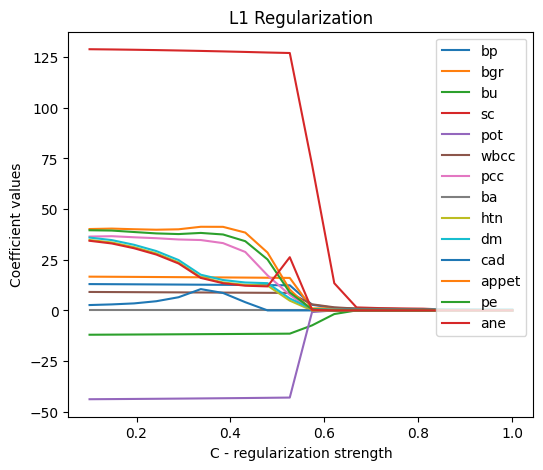

In [53]:
C_params = np.linspace(0.1, 1, num=20)
coefs = []
for C in C_params:
    m = logistic_regression(regularization='l1', C=C)
    m.fit(X_train, y_train)
    coefs.append(m.coef_)

# coefs = np.array(coefs)

# Plot the coefficients as a function of C
plt.figure(figsize=(6, 5))
plt.plot(C_params, coefs)
plt.xlabel('C - regularization strength')
plt.ylabel('Coefficient values')
plt.title('L1 Regularization')
plt.legend(X_train.columns, loc='upper right')
plt.show()

## L2 regularization

### Comparison with L2 sklearn LogisticRegression

In [19]:
model = logistic_regression(regularization='l2', C=2)
model.fit(X_train, y_train)
accuracy = model.accuracy(X_test, y_test)
print('accuracy: {:.2f}'.format(accuracy))
print('intercept:', model.intercept_)
print('coefs', model.coef_)

accuracy: 0.90
intercept: -1.4965035915207416
coefs [0.70847024 1.0436184  0.62360902 0.38388987 0.05375769 0.62510262
 1.09315996 0.54181942 1.86905326 2.15228529 0.48407544 1.48704944
 1.57217983 1.16492271]


In [20]:
model2 = LogisticRegression(penalty='l2', C=1/2, max_iter=1000)
model2.fit(X_train, y_train)
prediction2 = model2.predict(X_test)
accuracy2 = np.sum(prediction2 == y_test)/y_test.size
print('accuracy: {:.2f}'.format(accuracy))
print('intercept:', model2.intercept_[0])
print('coefs', model2.coef_[0])

accuracy: 0.90
intercept: -1.4965079918838506
coefs [0.70847866 1.04362591 0.62361268 0.38390468 0.05375089 0.62510851
 1.09316285 0.5418365  1.86905725 2.15227907 0.48406918 1.48704672
 1.57218726 1.16492995]


### Regularization plot

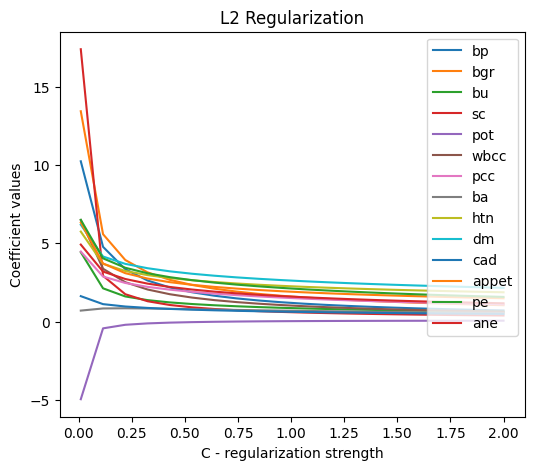

In [54]:
C_params = np.linspace(0.01, 2, num=20)
coefs = []
for C in C_params:
    m = logistic_regression(regularization='l2', C=C)
    m.fit(X_train, y_train)
    coefs.append(m.coef_)

# coefs = np.array(coefs)

# Plot the coefficients as a function of C
plt.figure(figsize=(6, 5))
plt.plot(C_params, coefs)
plt.xlabel('C - regularization strength')
plt.ylabel('Coefficient values')
plt.title('L2 Regularization')
plt.legend(X_train.columns, loc='upper right')
plt.show()

# Comparison with different classification models

In [5]:
def get_metrics(model, X_test, y_test):
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    return accuracy, precision, recall

In [42]:
# Evaluate logistic regression
lr = logistic_regression(regularization='none')
lr.fit(X_train, y_train)
lr_accuracy, lr_precision, lr_recall = get_metrics(model, X_test, y_test)

# Evaluate logistic regression with L1 regularization
lr_l1 = logistic_regression(regularization='l1', C=0.3)
lr_l1.fit(X_train, y_train)
lr_l1_accuracy, lr_l1_precision, lr_l1_recall = get_metrics(lr_l1, X_test, y_test)

# Evaluate logistic regression with L2 regularization
lr_l2 = logistic_regression(regularization='l2', C=2)
lr_l2.fit(X_train, y_train)
lr_l2_accuracy, lr_l2_precision, lr_l2_recall = get_metrics(lr_l2, X_test, y_test)

# Evaluate LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_accuracy, lda_precision, lda_recall = get_metrics(lda, X_test, y_test)

# Evaluate QDA
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda.fit(X_train, y_train)
qda_accuracy, qda_precision, qda_recall = get_metrics(qda, X_test, y_test)

# Evaluate KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_accuracy, knn_precision, knn_recall = get_metrics(knn, X_test, y_test)



c:\Users\jan20\PycharmProjects\PytorchProjects\venv\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


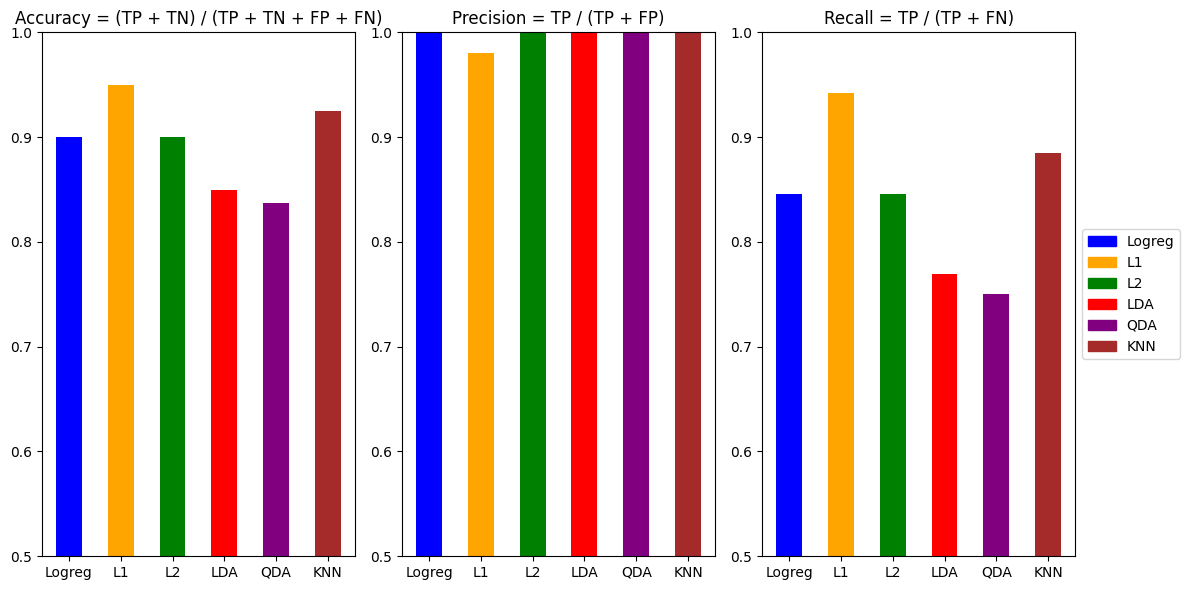

In [43]:
# plot results

models = ['Logreg', 'L1', 'L2', 'LDA', 'QDA', 'KNN']
accuracies = [lr_accuracy, lr_l1_accuracy, lr_l2_accuracy, lda_accuracy, qda_accuracy, knn_accuracy]
precisions = [lr_precision, lr_l1_precision, lr_l2_precision, lda_precision, qda_precision, knn_precision]
recalls = [lr_recall, lr_l1_recall, lr_l2_recall, lda_recall, qda_recall, knn_recall]

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # add a list of colors for each model

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
for i, (acc, pre, rec) in enumerate(zip(accuracies, precisions, recalls)):
    ax[0].bar(models[i], acc, color=colors[i], width=0.5)
    ax[1].bar(models[i], pre, color=colors[i], width=0.5)
    ax[2].bar(models[i], rec, color=colors[i], width=0.5)

ax[0].set_title('Accuracy = (TP + TN) / (TP + TN + FP + FN)')
ax[0].set_ylim([0.5, 1])
ax[1].set_title('Precision = TP / (TP + FP)')
ax[1].set_ylim([0.5, 1])
ax[2].set_title('Recall = TP / (TP + FN)')
ax[2].set_ylim([0.5, 1])

# add a legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax[2].legend(handles, models, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

# Interactions

In [45]:
number_of_interactions = list(range(0, 10, 2))
combinations = list(itertools.combinations(X_train.columns, 2))
L = 10
accuracies_avg, precisions_avg, recalls_avg = [], [], []

for num in number_of_interactions:
    accuracies, precisions, recalls = [], [], []
    for i in range(L):
        random.shuffle(combinations)
        comb_matrix = combinations[:num]
        
        X_train2 = add_columns_with_combinations(X_train, comb_matrix, func=np.multiply)
        X_test2 = add_columns_with_combinations(X_test, comb_matrix, func=np.multiply)
        
        lr = logistic_regression(regularization='none')
        lr.fit(X_train2, y_train)
        lr_accuracy, lr_precision, lr_recall = get_metrics(lr, X_test2, y_test)
        
        accuracies.append(lr_accuracy)
        precisions.append(lr_precision)
        recalls.append(lr_recall)
    accuracies_avg.append(np.mean(accuracies))
    precisions_avg.append(np.mean(precisions))
    recalls_avg.append(np.mean(recalls))


c:\Users\jan20\OneDrive\Pulpit\DS\sem2\Advanced_Machine_ Learning\Advanced_Machine_Learning\algo_implementation.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
c:\Users\jan20\OneDrive\Pulpit\DS\sem2\Advanced_Machine_ Learning\Advanced_Machine_Learning\algo_implementation.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
c:\Users\jan20\OneDrive\Pulpit\DS\sem2\Advanced_Machine_ Learning\Advanced_Machine_Learning\algo_implementation.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
c:\Users\jan20\OneDrive\Pulpit\DS\sem2\Advanced_Machine_ Learning\Advanced_Machine_Learning\algo_implementation.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
c:\Users\jan20\OneDrive\Pulpit\DS\sem2\Advanced_Machine_ Learning\Advanced_Machine_Learning\algo_implementation.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
c:\Users\jan20\OneDrive\Pulpit\DS\sem2\A

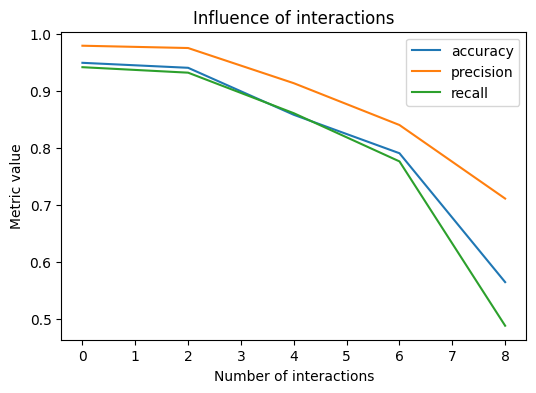

In [48]:
# plot results
fig = plt.figure(figsize=(6, 4))
plt.plot(number_of_interactions, accuracies_avg, label='accuracy')
plt.plot(number_of_interactions, precisions_avg, label='precision')
plt.plot(number_of_interactions, recalls_avg, label='recall')
plt.xlabel('Number of interactions')
plt.ylabel('Metric value')
plt.title('Influence of interactions')
plt.legend()
plt.show()
